In [258]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np


ModuleNotFoundError: ignored

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
train = pd.read_csv("pallet_train.csv")
x = train.drop('summ',axis=1)
y = train.summ 


In [0]:
#Normalizing
MAXX = ((x.max()).max())
MAXX = max(MAXX,y.max())

x = x/MAXX
y = y/MAXX

In [154]:
x.head()

,rr,bb,gg
0,0.115436,0.133852,0.167258
1,0.125120,0.126643,0.098904
2,0.121684,0.140799,0.171286
3,0.084877,0.106004,0.162194
4,-0.245338,-0.187749,0.144503


In [155]:
y.head()

0    0.416547
1    0.350668
2    0.433769
3    0.353075
4   -0.288584
Name: summ, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split

In [229]:
#make the x for train and test (also called validation data) 
xtrain,xtest,ytrain,ytest = train_test_split(x,y,
                                             train_size=.35
                                             )
print("Size of train data: "+ str(xtrain.shape))

Size of train data: (8, 3)


In [238]:
hidden = tf.keras.layers.Dense(units=10,
                               input_shape=[3],
                               activation = 'elu'
                               )

output = tf.keras.layers.Dense(units=1,
                               activation = 'linear'
                               )

model = tf.keras.Sequential([hidden, output])
model.compile(loss='mean_squared_error'
              )
history = model.fit(xtrain,ytrain,
                    epochs=1000,
                    shuffle= True,
                    verbose=False)
print("Finished training the model")


Finished training the model


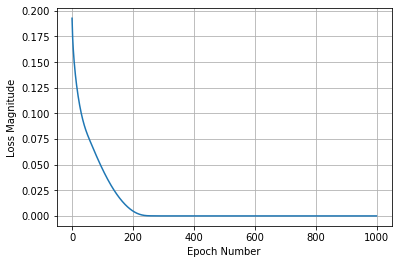

In [286]:
import matplotlib.pyplot as plt1
plt1.grid()

plt1.xlabel('Epoch Number')
plt1.ylabel("Loss Magnitude")
plt1.plot(history.history['loss'])

In [0]:
# Make predictions using the test set
pred = model.predict(xtest)
pred = pred*MAXX

In [0]:
x_axes = xtest.shape[0]
x_axes = range(x_axes)

In [0]:
ytestt = ytest*MAXX
#ytest

In [268]:
pred = list(pred)
table = pd.DataFrame(
                      {'Expected': ytestt,
                       'Predicted' : pred
                      })
print(table)
table.to_csv('elu_lin.csv')

     Expected     Predicted
17  170.50320   [174.40681]
20 -277.92718  [-266.20633]
0   414.07920   [419.44797]
15  350.10360   [354.02982]
6   458.89242    [464.4342]
2   431.19920    [436.5054]
19  274.42896   [279.18784]
4  -286.87500   [-269.1825]
3   350.98320   [356.54742]
22  -94.20716   [-92.96275]
18  181.87008   [185.86726]
13  -24.13704   [-22.47338]
1   348.59062   [353.23596]
8   994.07670    [981.7294]
11  848.09020   [841.68994]
5   383.50054    [389.6225]


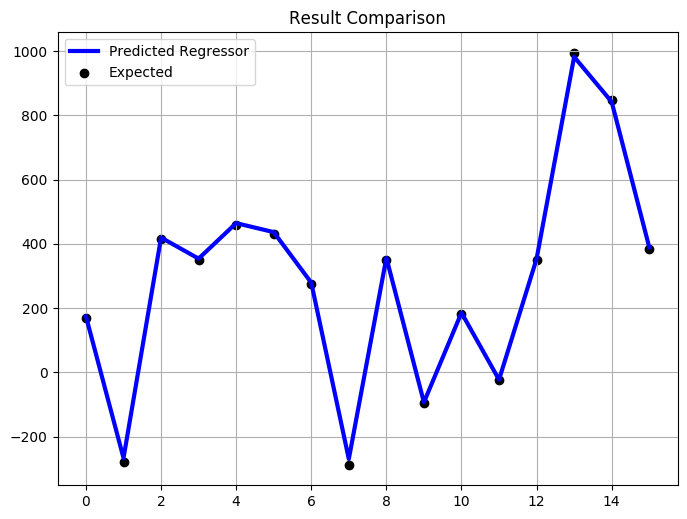

In [293]:
# Plot outputs
import matplotlib.pyplot as plt
#Enlarges the plot
plt.figure(figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

plt.grid()
plt.title('Result Comparison')

#Its important to label the plot (& scatter) right where you draw them
plt.scatter(x_axes, ytestt,  color='black', label='Expected')
plt.plot(x_axes, pred, color='blue', linewidth=3, label='Predicted Regressor')

plt.legend(loc='upper left')   #The order is important
plt.show()